<a href="https://colab.research.google.com/github/Pragat007/Flower_Classifications/blob/main/Flower_classification_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import above mentioned libraries.
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam


In [ ]:
from pathlib import Path

# dataset_url = link of the dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = Path(data_dir)

In [ ]:
img_count=len(list(data_dir.glob('*/*.jpg')))
print(img_count)

3670


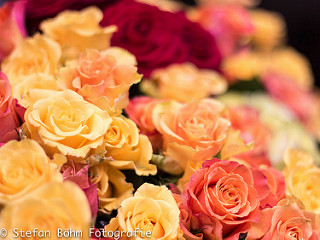

In [ ]:
rose=list(data_dir.glob('roses/*'))
PIL.Image.open(str(rose[0]))

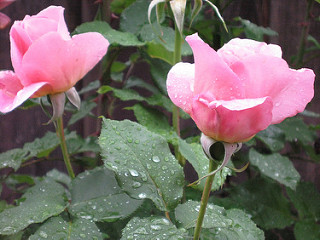

In [ ]:
PIL.Image.open(str(rose[2]))

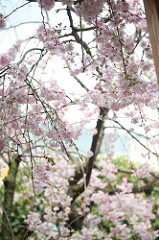

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


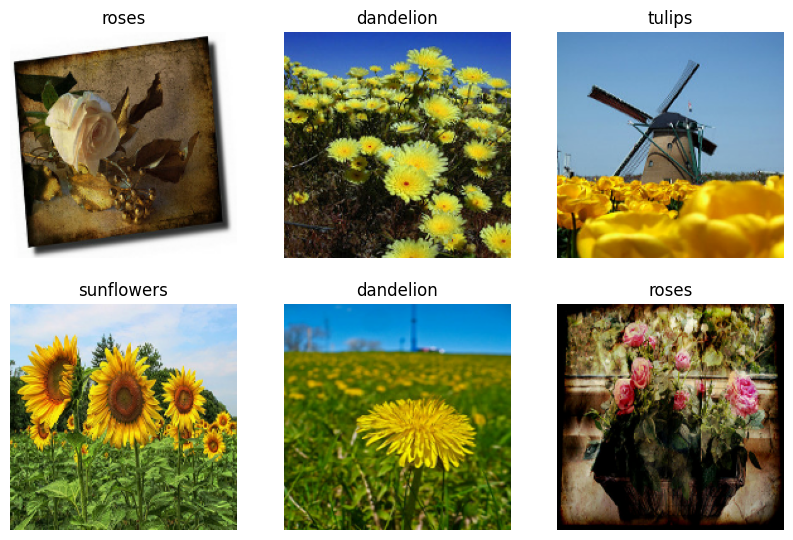

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i +1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
resnet_model=Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(img_height, img_width,3),pooling='avg',classes=5,weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
epochs=10
history=resnet_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
92/92 [==============================] - 613s 7s/step - loss: 0.6735 - accuracy: 0.7790 - val_loss: 0.4627 - val_accuracy: 0.8297
Epoch 2/10
92/92 [==============================] - 538s 6s/step - loss: 0.2903 - accuracy: 0.8951 - val_loss: 0.4809 - val_accuracy: 0.8324
Epoch 3/10
92/92 [==============================] - 539s 6s/step - loss: 0.1758 - accuracy: 0.9356 - val_loss: 0.3675 - val_accuracy: 0.8665
Epoch 4/10
92/92 [==============================] - 545s 6s/step - loss: 0.1042 - accuracy: 0.9670 - val_loss: 0.4146 - val_accuracy: 0.8515
Epoch 5/10
92/92 [==============================] - 530s 6s/step - loss: 0.0508 - accuracy: 0.9874 - val_loss: 0.3869 - val_accuracy: 0.8719
Epoch 6/10
92/92 [==============================] - 536s 6s/step - loss: 0.0296 - accuracy: 0.9963 - val_loss: 0.3849 - val_accuracy: 0.8801
Epoch 7/10
92/92 [==============================] - 537s 6s/step - loss: 0.0116 - accuracy: 0.9993 - val_loss: 0.3967 - val_accuracy: 0.8856
Epoch 8/10
92

In [ ]:
# After training your model locally
resnet_model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


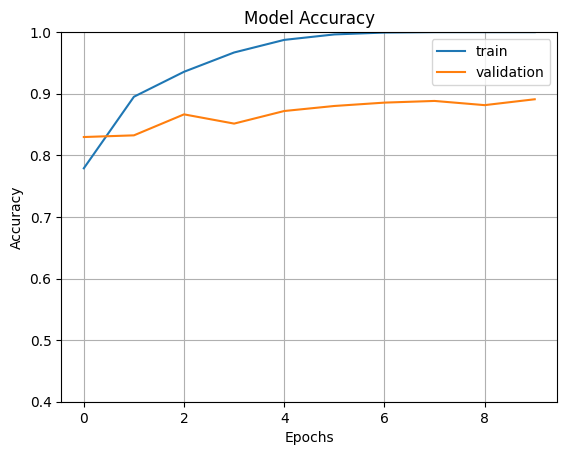

In [ ]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

# **Visulaizing image of rose and tulips using cv2**

In [ ]:
import cv2
roses=list(data_dir.glob('roses/*'))
image=cv2.imread(str(roses[0]))
image_resized=cv2.resize(image,(img_height,img_width))
image1=np.expand_dims(image_resized,axis=0)

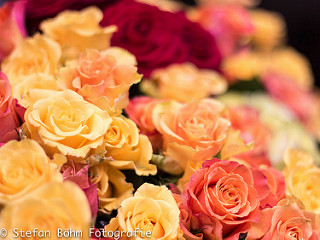

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
tulip=list(data_dir.glob('tulips/*'))
image=cv2.imread(str(tulip[1]))
image_resized=cv2.resize(image,(img_height,img_width))
image2=np.expand_dims(image_resized,axis=0)

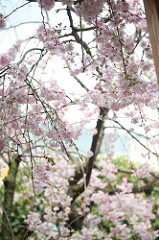

In [ ]:
PIL.Image.open(str(tulip[0]))

In [ ]:
pre1=resnet_model.predict(image1)
pre2=resnet_model.predict(image2)

1/1 [==============================] - 0s 289ms/step


In [ ]:
output_class=class_names[np.argmax(pre1)]
print("The Predicted class is ",output_class)

The Predicted class is  roses


In [ ]:
output_class2=class_names[np.argmax(pre2)]
print("The Predicted class is ",output_class2)

The Predicted class is  tulips


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
!pip uninstall gradio==3.15.0 -y
!pip install gradio==3.9.0

Found existing installation: gradio 2.9.4
Uninstalling gradio-2.9.4:
  Successfully uninstalled gradio-2.9.4
INFO: pip is looking at multiple versions of httpcore to determine which version is compatible with other requirements. This could take a while.
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
INFO: pip is still looking at multiple versions of httpcore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB

In [ ]:
!pip install -U httpcore

  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.12.0
    Uninstalling h11-0.12.0:
      Successfully uninstalled h11-0.12.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.15.0
    Uninstalling httpcore-0.15.0:
      Successfully uninstalled httpcore-0.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 3.9 requires h11<0.13,>=0.11, but you have h11 0.14.0 which is incompatible.


In [ ]:
import numpy as np
import gradio as gr
from tensorflow.keras.models import load_model
from PIL import Image

# Load the pre-trained model
resnet_model = load_model('model.h5')

class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

def predict_image(img):
    # Ensure the image is resized to 180x180 pixels
    img_resized = np.array(Image.fromarray(img).resize((180, 180)).convert('RGB'))

    # Reshape the image to match the input shape expected by the model
    img_4d = img_resized.reshape(-1, 180, 180, 3)

    prediction = resnet_model.predict(img_4d)[0]

    return {class_names[i]: float(prediction[i]) for i in range(5)}

# Define the Gradio interface using the older version
inputs = gr.inputs.Image(shape=(180, 180))  # Ensure the image has the correct shape
outputs = gr.outputs.Label(num_top_classes=5)

iface = gr.Interface(
    fn=predict_image,
    inputs=inputs,
    outputs=outputs
)

iface.launch(debug=True, share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.9, however version 4.29.0 is available, please upgrade.
--------
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link, please check your internet connection.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 281ms/step
Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7ea9a45885b0>, 'http://127.0.0.1:7861/', None)